<H1>RESTAURANT FOOD COST MACHINE LEARNING MODEL</H1>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
#Importing the dataset

In [4]:
df = pd.read_excel('Data_Train.xlsx')

In [5]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11687 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [383]:
df.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [8]:
df_test = pd.read_excel('Data_Test.xlsx')
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [9]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [10]:
df.isnull().sum()

TITLE            1003
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [11]:
df_test['COST'] = '?'

In [12]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,?
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,?
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,?
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,?
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,?
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,?
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,?


In [15]:
df = pd.concat([df, df_test])
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,?
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,?


In [16]:
#Exploratory Data Analysis

In [17]:
df['TITLE'].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', nan, 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR',
 

In [18]:
df['TITLE'].nunique()

122

In [19]:
df['CUISINES'].unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'European, Mediterranean, Italian, Sushi',
       'North Indian, Chinese, Kebab, Juices', 'Sindhi, Street Food'],
      dtype=object)

In [20]:
df['CUISINES'].nunique()

5183

In [21]:
df['CITY'].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', nan, 'India', 'Madhuranagar', 'Chennai Teynampet',
       'Faridabad', 'Chembur.', 'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Bengalore', 'Near Reliance Fresh', 'Kilpauk', 'Bengaluru',
       'Kothaguda', 'Goregaon West', 'Banglore', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to

In [22]:
df['CITY'].nunique()

450

In [23]:
#We will drop RESTAURANT ID AS IT IS UNIQUE AS DOESNT HAVE A SAY IN COST

In [24]:
df.drop(['RESTAURANT_ID'], axis=1, inplace=True)

In [25]:
df['CITY'] = df['CITY'].astype(str).apply(lambda x: x.split(' ')[0])
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287 votes,?
4227,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?
4228,QUICK BITES,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?
4229,QUICK BITES,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,?


In [26]:
df['TITLE'] = df['TITLE'].astype(str).apply(lambda x: x.split(' ')[0])
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,CASUAL,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...
4226,CASUAL,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287 votes,?
4227,nan,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?
4228,QUICK,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?
4229,QUICK,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,?


In [27]:
df['NORTH INDIAN'] = df['CUISINES'].astype(str).apply(lambda x: 1 if 'north indian' in x.lower() else 0)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN
0,CASUAL,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1
1,CASUAL,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0
2,CASUAL,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1
3,QUICK,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0
4,DESSERT,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0
...,...,...,...,...,...,...,...,...,...
4226,CASUAL,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287 votes,?,1
4227,nan,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?,1
4228,QUICK,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?,1
4229,QUICK,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,?,0


In [28]:
df['SOUTH INDIAN'] = df['CUISINES'].astype(str).apply(lambda x: 1 if 'south indian' in x.lower() else 0)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN
0,CASUAL,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0
1,CASUAL,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0
2,CASUAL,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0
3,QUICK,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0
4,DESSERT,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0
...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287 votes,?,1,0
4227,nan,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?,1,0
4228,QUICK,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?,1,0
4229,QUICK,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,?,0,0


In [29]:
df['CHINESE'] = df['CUISINES'].astype(str).apply(lambda x: 1 if 'chinese' in x.lower() else 0)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE
0,CASUAL,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0,0
1,CASUAL,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,0
2,CASUAL,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0,1
3,QUICK,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,1
4,DESSERT,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287 votes,?,1,0,1
4227,nan,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?,1,0,0
4228,QUICK,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?,1,0,0
4229,QUICK,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,?,0,0,0


In [30]:
df['CONTINENTAL'] = df['CUISINES'].astype(str).apply(lambda x: 1 if 'continental' in x.lower() else 0)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL
0,CASUAL,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0,0,0
1,CASUAL,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,0,0
2,CASUAL,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0,1,0
3,QUICK,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,1,0
4,DESSERT,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287 votes,?,1,0,1,0
4227,nan,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?,1,0,0,0
4228,QUICK,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?,1,0,0,1
4229,QUICK,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,?,0,0,0,0


In [31]:
df['ITALIAN'] = df['CUISINES'].astype(str).apply(lambda x: 1 if 'italian' in x.lower() else 0)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN
0,CASUAL,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0,0,0,0
1,CASUAL,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,0,0,0
2,CASUAL,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0,1,0,0
3,QUICK,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,1,0,0
4,DESSERT,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287 votes,?,1,0,1,0,0
4227,nan,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?,1,0,0,0,0
4228,QUICK,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?,1,0,0,1,0
4229,QUICK,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,?,0,0,0,0,0


In [404]:
df['ASIAN'] = df['CUISINES'].astype(str).apply(lambda x: 1 if 'asian' in x.lower() else 0)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,ASIAN
0,CASUAL,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0,0,0,0,0
1,CASUAL,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,0,0,0,1
2,CASUAL,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0,1,0,0,0
3,QUICK,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,1,0,0,0
4,DESSERT,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,QUICK,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,1,0,0,0,0,0
12686,CASUAL,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,0,0,0,1,0,0
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi,Vashi,4.0,608 votes,1300,0,0,1,1,0,1
12688,CASUAL,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,1,1,1,0,0,0


In [32]:
df['AMERICAN'] = df['CUISINES'].astype(str).apply(lambda x: 1 if 'american' in x.lower() else 0)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN
0,CASUAL,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0,0,0,0,0
1,CASUAL,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,0,0,0,0
2,CASUAL,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0,1,0,0,0
3,QUICK,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,1,0,0,0
4,DESSERT,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287 votes,?,1,0,1,0,0,0
4227,nan,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?,1,0,0,0,0,0
4228,QUICK,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?,1,0,0,1,0,0
4229,QUICK,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,?,0,0,0,0,0,0


In [33]:
df.iloc[100:110]

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN
100,BAKERY,"Bakery, Desserts",9am – 11pm (Mon-Sun),Chennai,Anna Nagar East,3.8,66 votes,400,0,0,0,0,0,0
101,BEVERAGE,"Juices, Fast Food, Sandwich, Beverages","10am – 10pm (Mon),9:30am – 10pm (Tue),9:30am –...",Chennai,Poonamalle,3.4,19 votes,250,0,0,0,0,0,0
102,nan,"Burger, Sandwich","11am – 10pm (Mon, Tue, Wed, Thu, Fri, Sun), 11...",Chennai,Purasaiwalkam,3.5,27 votes,200,0,0,0,0,0,0
103,CASUAL,"Hyderabadi, Andhra, North Indian, Chinese, Sou...","12noon – 4pm, 7pm – 11pm (Mon-Sun)",Bangalore,Whitefield,4.0,284 votes,800,1,1,1,0,0,0
104,QUICK,"Kerala, South Indian",11am – 11pm (Mon-Sun),Kochi,Marine Drive,2.7,119 votes,350,0,1,0,0,0,0
105,CASUAL,"Malwani, Seafood, Maharashtrian","11:30am – 3:30pm, 7pm – 10:30pm (Mon, Wed)...",Mumbai,Dadar West,4.3,1259 votes,700,0,0,0,0,0,0
106,CASUAL,"Mediterranean, Continental, Italian, Salad","11:45am – 3:30pm, 6:45pm – 11:30pm (Mon-Sun)",Bangalore,Kalyan Nagar,4.2,789 votes,1400,0,0,0,1,1,0
107,QUICK,"Fast Food, Continental, North Indian",8am – 11pm (Mon-Sun),Kochi,Kakkanad,3.4,159 votes,300,1,0,0,1,0,0
108,BAKERY,"Bakery, Desserts, Beverages",7am – 12midnight (Mon-Sun),Bangalore,BTM,4.0,17 votes,450,0,0,0,0,0,0
109,CASUAL,North Indian,"12noon – 3pm, 7pm – 10:30pm (Mon-Sun)",Kochi,Kakkanad,4.1,180 votes,250,1,0,0,0,0,0


In [34]:
df['MALWANI'] = df['CUISINES'].astype(str).apply(lambda x: 1 if 'malwani' in x.lower() else 0)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI
0,CASUAL,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0,0,0,0,0,1
1,CASUAL,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,0,0,0,0,0
2,CASUAL,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0,1,0,0,0,0
3,QUICK,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,1,0,0,0,0
4,DESSERT,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287 votes,?,1,0,1,0,0,0,0
4227,nan,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?,1,0,0,0,0,0,0
4228,QUICK,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?,1,0,0,1,0,0,0
4229,QUICK,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,?,0,0,0,0,0,0,0


In [35]:
df['ARABIC'] = df['CUISINES'].astype(str).apply(lambda x: 1 if 'arabic' in x.lower() else 0)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC
0,CASUAL,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0,0,0,0,0,1,0
1,CASUAL,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,0,0,0,0,0,0
2,CASUAL,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0,1,0,0,0,0,0
3,QUICK,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,1,0,0,0,0,0
4,DESSERT,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287 votes,?,1,0,1,0,0,0,0,0
4227,nan,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?,1,0,0,0,0,0,0,0
4228,QUICK,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?,1,0,0,1,0,0,0,0
4229,QUICK,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,?,0,0,0,0,0,0,0,0


In [36]:
df['BURGER'] = df['CUISINES'].astype(str).apply(lambda x: 1 if 'burger' in x.lower() else 0)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER
0,CASUAL,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0,0,0,0,0,1,0,0
1,CASUAL,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,0,0,0,0,0,0,0
2,CASUAL,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0,1,0,0,0,0,0,0
3,QUICK,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,1,0,0,0,0,0,0
4,DESSERT,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287 votes,?,1,0,1,0,0,0,0,0,0
4227,nan,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?,1,0,0,0,0,0,0,0,0
4228,QUICK,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?,1,0,0,1,0,0,0,0,0
4229,QUICK,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,?,0,0,0,0,0,0,0,0,0


In [37]:
df['DESSERT'] = df['CUISINES'].astype(str).apply(lambda x: 1 if 'dessert' in x.lower() else 0)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT
0,CASUAL,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0,0,0,0,0,1,0,0,0
1,CASUAL,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,0,0,0,0,0,0,0,0
2,CASUAL,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0,1,0,0,0,0,0,0,0
3,QUICK,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,1,0,0,0,0,0,0,0
4,DESSERT,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287 votes,?,1,0,1,0,0,0,0,0,0,0
4227,nan,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?,1,0,0,0,0,0,0,0,0,0
4228,QUICK,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?,1,0,0,1,0,0,0,0,0,0
4229,QUICK,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,?,0,0,0,0,0,0,0,0,0,0


In [38]:
df.iloc[270:280]

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT
270,BEVERAGE,"Beverages, Desserts, Fast Food",11am – 4am (Mon-Sun),Bangalore,Doddathoguru Electronic City,NEW,NaN,200,0,0,0,0,0,0,0,0,0,1
271,CAFÉ,"Cafe, Beverages, Fast Food, Sandwich, Salad, C...",11am – 1am (Mon-Sun),Chembur.,Tilak Nagar,4.2,842 votes,300,0,0,0,0,0,0,0,0,0,0
272,CASUAL,"South Indian, North Indian, Chinese",7:30am – 10:30pm (Mon-Sun),Chennai,GST Road,3.0,161 votes,550,1,1,1,0,0,0,0,0,0,0
273,QUICK,"Biryani, North Indian, Kebab",11am – 4am (Mon-Sun),Bangalore,BTM 1 Stage BTM,3.9,221 votes,600,1,0,0,0,0,0,0,0,0,0
274,CASUAL,"Continental, Italian, Seafood, North Indian, Cafe",11am – 12midnight (Mon-Sun),Maharashtra,Mumbai,4.2,309 votes,2000,1,0,0,1,1,0,0,0,0,0
275,QUICK,Fast Food,11am – 11pm (Mon-Sun),Chennai,Nungambakkam,3.3,138 votes,350,0,0,0,0,0,0,0,0,0,0
276,QUICK,"North Indian, Chinese, Mughlai, Continental",11am – 11pm (Mon-Sun),Faridabad,Sector 15,4.1,145 votes,500,1,0,1,1,0,0,0,0,0,0
277,CASUAL,"North Indian, Chinese, Seafood, Biryani",11am – 12midnight (Mon-Sun),Mumbai,Vile Parle East,3.8,297 votes,750,1,0,1,0,0,0,0,0,0,0
278,nan,"North Indian, Mughlai, Chinese","12noon – 4pm, 6pm – 11pm (Mon-Sun)",New,Vasant Kunj,4.0,212 votes,600,1,0,1,0,0,0,0,0,0,0
279,QUICK,"North Indian, Chinese, Continental","Closed (Mon),7pm – 7am (Tue-Sun)",Chennai,Ramapuram,2.9,227 votes,600,1,0,1,1,0,0,0,0,0,0


In [39]:
df['BAKERY'] = df['CUISINES'].astype(str).apply(lambda x: 1 if 'bakery' in x.lower() else 0)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT,BAKERY
0,CASUAL,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0,0,0,0,0,1,0,0,0,0
1,CASUAL,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,0,0,0,0,0,0,0,0,0
2,CASUAL,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0,1,0,0,0,0,0,0,0,0
3,QUICK,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,1,0,0,0,0,0,0,0,0
4,DESSERT,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287 votes,?,1,0,1,0,0,0,0,0,0,0,0
4227,nan,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?,1,0,0,0,0,0,0,0,0,0,0
4228,QUICK,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?,1,0,0,1,0,0,0,0,0,0,0
4229,QUICK,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,?,0,0,0,0,0,0,0,0,0,0,0


In [41]:
df['MUGHLAI'] = df['CUISINES'].astype(str).apply(lambda x: 1 if 'mughlai' in x.lower() else 0)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,...,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT,BAKERY,GOAN,MUGHLAI
0,CASUAL,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0,...,0,0,0,1,0,0,0,0,1,0
1,CASUAL,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CASUAL,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0,...,0,0,0,0,0,0,0,0,0,0
3,QUICK,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,...,0,0,0,0,0,0,0,0,0,0
4,DESSERT,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287 votes,?,1,0,...,0,0,0,0,0,0,0,0,0,1
4227,nan,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?,1,0,...,0,0,0,0,0,0,0,0,0,0
4228,QUICK,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?,1,0,...,1,0,0,0,0,0,0,0,0,0
4229,QUICK,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,?,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df['GOAN'] = df['CUISINES'].astype(str).apply(lambda x: 1 if 'goa' in x.lower() else 0)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT,BAKERY,GOAN
0,CASUAL,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0,0,0,0,0,1,0,0,0,0,1
1,CASUAL,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,0,0,0,0,0,0,0,0,0,0
2,CASUAL,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0,1,0,0,0,0,0,0,0,0,0
3,QUICK,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,1,0,0,0,0,0,0,0,0,0
4,DESSERT,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287 votes,?,1,0,1,0,0,0,0,0,0,0,0,0
4227,nan,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?,1,0,0,0,0,0,0,0,0,0,0,0
4228,QUICK,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?,1,0,0,1,0,0,0,0,0,0,0,0
4229,QUICK,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,?,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,...,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT,BAKERY,GOAN,MUGHLAI
0,CASUAL,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0,...,0,0,0,1,0,0,0,0,1,0
1,CASUAL,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CASUAL,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0,...,0,0,0,0,0,0,0,0,0,0
3,QUICK,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,...,0,0,0,0,0,0,0,0,0,0
4,DESSERT,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287 votes,?,1,0,...,0,0,0,0,0,0,0,0,0,1
4227,nan,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?,1,0,...,0,0,0,0,0,0,0,0,0,0
4228,QUICK,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?,1,0,...,1,0,0,0,0,0,0,0,0,0
4229,QUICK,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,?,0,0,...,0,0,0,0,0,0,0,0,0,0


In [415]:
#DATA TRANSFORMATION

In [45]:
df.drop('CUISINES', axis=1, inplace=True)
df

,TITLE,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT,BAKERY,GOAN,MUGHLAI
0,CASUAL,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0,0,0,0,0,1,0,0,0,0,1,0
1,CASUAL,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CASUAL,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0,1,0,0,0,0,0,0,0,0,0,0
3,QUICK,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,1,0,0,0,0,0,0,0,0,0,0
4,DESSERT,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287 votes,?,1,0,1,0,0,0,0,0,0,0,0,0,1
4227,nan,11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?,1,0,0,0,0,0,0,0,0,0,0,0,0
4228,QUICK,9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?,1,0,0,1,0,0,0,0,0,0,0,0,0
4229,QUICK,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,?,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
df.iloc[700:720]

,TITLE,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT,BAKERY,GOAN,MUGHLAI
700,CAFÉ,12noon – 11pm (Mon-Sun),Chennai,Chennai,4.5,1336 votes,700,0,0,0,1,0,0,0,0,0,1,0,0,0
701,QUICK,6:30am – 10:30pm (Mon-Sun),Kochi,Kacheripady,3.4,8 votes,200,0,1,0,0,0,0,0,0,0,0,0,0,0
702,QUICK,11am – 12midnight (Mon-Sun),Kochi,Vennala,3.3,16 votes,500,1,0,0,0,0,0,0,0,0,0,0,0,0
703,"BAR,LOUNGE","5pm – 11:30pm (Mon, Tue, Wed, Thu, Sun), 5pm –...",Bangalore,Whitefield,4.1,834 votes,1900,0,0,0,0,0,0,0,0,0,0,0,0,0
704,nan,"10am – 10pm (Mon-Sat),Closed (Sun)",Chennai,Chetpet,3.5,29 votes,300,0,0,0,0,0,0,0,0,0,0,1,0,0
705,nan,12noon – 3am (Mon-Sun),Chennai,Thousand Lights,3.8,291 votes,400,0,0,0,0,0,0,0,0,0,0,0,0,1
706,QUICK,11am – 10pm (Mon-Sun),Hyderabad,Banjara Hills,3.7,111 votes,200,0,0,1,0,0,0,0,0,0,0,0,0,0
707,QUICK,12noon – 12midnight (Mon-Sun),Hyderabad,Habsiguda,3.8,89 votes,250,0,0,1,0,0,0,0,0,0,0,0,0,0
708,MESS,8am – 11pm (Mon-Sun),Chennai,Navallur,3.3,104 votes,200,0,0,0,0,0,0,0,0,0,0,0,0,0
709,QUICK,24 Hours (Mon-Sun),Gurgaon,DLF Phase 3,4.0,79 votes,400,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
df['RATING']

0       3.6
1       4.2
2       3.8
3       4.1
4       3.8
       ... 
4226    3.9
4227    4.3
4228    3.7
4229      -
4230    3.7
Name: RATING, Length: 16921, dtype: object

In [48]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [49]:
df['RATING'].value_counts()

RATING
3.9    1643
3.8    1604
4.0    1498
3.7    1437
3.6    1261
4.1    1217
3.5     988
4.2     968
NEW     930
3.4     777
4.3     740
-       672
3.3     485
4.4     484
3.2     349
4.5     274
3.1     263
2.9     242
3.0     229
2.8     191
4.6     184
2.7     129
4.7      90
2.6      85
2.5      51
4.8      49
4.9      28
2.4      24
2.3      15
2.1       4
2.2       4
2.0       2
Name: count, dtype: int64

In [50]:
#We will fill the nan, new and - values with 3.9 the most common value

In [51]:
def condition(x):
    if x=='NEW':
        return '3.9'
    elif x=='-':
        return '3.9'
    elif x==np.nan:
        return '3.9'
    elif x=='nan':
        return '3.9'
    else:
        return x

In [52]:
df['RATING'] = df['RATING'].apply(condition)
df

,TITLE,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT,BAKERY,GOAN,MUGHLAI
0,CASUAL,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,1,0,0,0,0,0,1,0,0,0,0,1,0
1,CASUAL,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CASUAL,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,1,0,1,0,0,0,0,0,0,0,0,0,0
3,QUICK,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,1,0,0,0,0,0,0,0,0,0,0
4,DESSERT,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287 votes,?,1,0,1,0,0,0,0,0,0,0,0,0,1
4227,nan,11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,?,1,0,0,0,0,0,0,0,0,0,0,0,0
4228,QUICK,9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,?,1,0,0,1,0,0,0,0,0,0,0,0,0
4229,QUICK,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,3.9,NaN,?,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
df['RATING'].value_counts()

RATING
3.9    3245
3.8    1604
4.0    1498
3.7    1437
3.6    1261
4.1    1217
3.5     988
4.2     968
3.4     777
4.3     740
3.3     485
4.4     484
3.2     349
4.5     274
3.1     263
2.9     242
3.0     229
2.8     191
4.6     184
2.7     129
4.7      90
2.6      85
2.5      51
4.8      49
4.9      28
2.4      24
2.3      15
2.1       4
2.2       4
2.0       2
Name: count, dtype: int64

In [54]:
#Now in votes column there is a string votes after the number of votes so we need to remove that

In [55]:
df['VOTES'].value_counts()

VOTES
44 votes      92
22 votes      88
6 votes       87
29 votes      83
24 votes      81
              ..
3369 votes     1
1554 votes     1
1139 votes     1
1340 votes     1
1913 votes     1
Name: count, Length: 2075, dtype: int64

In [56]:
df['VOTES'] = df['VOTES'].astype(str).apply(lambda x: x[:-6])
df

,TITLE,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT,BAKERY,GOAN,MUGHLAI
0,CASUAL,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,1,0,0,0,0,0,1,0,0,0,0,1,0
1,CASUAL,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CASUAL,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,1,0,1,0,0,0,0,0,0,0,0,0,0
3,QUICK,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,0,0,1,0,0,0,0,0,0,0,0,0,0
4,DESSERT,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287,?,1,0,1,0,0,0,0,0,0,0,0,0,1
4227,nan,11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469,?,1,0,0,0,0,0,0,0,0,0,0,0,0
4228,QUICK,9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53,?,1,0,0,1,0,0,0,0,0,0,0,0,0
4229,QUICK,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,3.9,,?,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16921 entries, 0 to 4230
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TITLE         16921 non-null  object
 1   TIME          16921 non-null  object
 2   CITY          16921 non-null  object
 3   LOCALITY      16793 non-null  object
 4   RATING        16917 non-null  object
 5   VOTES         16921 non-null  object
 6   COST          16921 non-null  object
 7   NORTH INDIAN  16921 non-null  int64 
 8   SOUTH INDIAN  16921 non-null  int64 
 9   CHINESE       16921 non-null  int64 
 10  CONTINENTAL   16921 non-null  int64 
 11  ITALIAN       16921 non-null  int64 
 12  AMERICAN      16921 non-null  int64 
 13  MALWANI       16921 non-null  int64 
 14  ARABIC        16921 non-null  int64 
 15  BURGER        16921 non-null  int64 
 16  DESSERT       16921 non-null  int64 
 17  BAKERY        16921 non-null  int64 
 18  GOAN          16921 non-null  int64 
 19  MUGHLAI   

In [58]:
df['RATING'] = df['RATING'].astype(float)
df

,TITLE,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT,BAKERY,GOAN,MUGHLAI
0,CASUAL,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,1,0,0,0,0,0,1,0,0,0,0,1,0
1,CASUAL,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CASUAL,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,1,0,1,0,0,0,0,0,0,0,0,0,0
3,QUICK,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,0,0,1,0,0,0,0,0,0,0,0,0,0
4,DESSERT,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287,?,1,0,1,0,0,0,0,0,0,0,0,0,1
4227,nan,11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469,?,1,0,0,0,0,0,0,0,0,0,0,0,0
4228,QUICK,9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53,?,1,0,0,1,0,0,0,0,0,0,0,0,0
4229,QUICK,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,3.9,,?,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16921 entries, 0 to 4230
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TITLE         16921 non-null  object 
 1   TIME          16921 non-null  object 
 2   CITY          16921 non-null  object 
 3   LOCALITY      16793 non-null  object 
 4   RATING        16917 non-null  float64
 5   VOTES         16921 non-null  object 
 6   COST          16921 non-null  object 
 7   NORTH INDIAN  16921 non-null  int64  
 8   SOUTH INDIAN  16921 non-null  int64  
 9   CHINESE       16921 non-null  int64  
 10  CONTINENTAL   16921 non-null  int64  
 11  ITALIAN       16921 non-null  int64  
 12  AMERICAN      16921 non-null  int64  
 13  MALWANI       16921 non-null  int64  
 14  ARABIC        16921 non-null  int64  
 15  BURGER        16921 non-null  int64  
 16  DESSERT       16921 non-null  int64  
 17  BAKERY        16921 non-null  int64  
 18  GOAN          16921 non-null  in

In [60]:
df['VOTES'].unique()

array(['49', '30', '221', ..., '2159', '3807', '1913'], dtype=object)

In [61]:
df['VOTES'].value_counts()

VOTES
        1606
44        92
22        88
6         87
29        83
        ... 
3369       1
1554       1
1139       1
1340       1
1913       1
Name: count, Length: 2076, dtype: int64

In [62]:
df[df['VOTES']=='']

,TITLE,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT,BAKERY,GOAN,MUGHLAI
13,CASUAL,11am – 11:30pm (Mon-Sun),Kochi,Edappally,3.9,,400,0,1,0,0,0,0,0,0,0,0,0,0,0
62,QUICK,11am – 11pm (Mon-Sun),Kochi,Kalamassery,3.9,,200,1,0,0,0,0,0,0,0,0,0,0,0,0
69,nan,11am – 11pm (Mon-Sun),New,Kalkaji,3.9,,200,0,0,0,0,0,0,0,0,0,0,0,0,0
85,QUICK,"Closed (Mon),7:30am – 10:30pm (Tue-Sun)",Bangalore,Vijay Nagar,3.9,,300,1,1,0,0,0,0,0,0,0,0,0,0,0
111,CASUAL,"11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",Mumbai,Borivali West,3.9,,800,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,CAFÉ,11am – 11pm (Mon-Sun),Noida,Sector 63,3.9,,?,1,0,0,0,0,0,0,0,0,0,0,0,0
4185,QUICK,12:30pm – 10:30pm (Mon-Sun),New,Shalimar Bagh,3.9,,?,0,0,0,0,0,0,0,0,0,0,0,0,0
4198,QUICK,11am – 12midnight (Mon-Sun),Bangalore,Indiranagar,3.9,,?,0,0,0,1,0,0,0,0,0,0,0,0,0
4223,CASUAL,"11:30am – 4pm, 7pm – 11:30pm (Mon-Sun)",Mumbai,Lower Parel,3.9,,?,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
df['VOTES'] = df['VOTES'].apply(lambda x: '0' if x=='' else x)
df

,TITLE,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT,BAKERY,GOAN,MUGHLAI
0,CASUAL,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,1,0,0,0,0,0,1,0,0,0,0,1,0
1,CASUAL,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CASUAL,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,1,0,1,0,0,0,0,0,0,0,0,0,0
3,QUICK,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,0,0,1,0,0,0,0,0,0,0,0,0,0
4,DESSERT,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287,?,1,0,1,0,0,0,0,0,0,0,0,0,1
4227,nan,11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469,?,1,0,0,0,0,0,0,0,0,0,0,0,0
4228,QUICK,9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53,?,1,0,0,1,0,0,0,0,0,0,0,0,0
4229,QUICK,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,3.9,0,?,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
df['VOTES'] = df['VOTES'].astype(int)
df

,TITLE,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT,BAKERY,GOAN,MUGHLAI
0,CASUAL,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,1,0,0,0,0,0,1,0,0,0,0,1,0
1,CASUAL,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CASUAL,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,1,0,1,0,0,0,0,0,0,0,0,0,0
3,QUICK,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,0,0,1,0,0,0,0,0,0,0,0,0,0
4,DESSERT,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287,?,1,0,1,0,0,0,0,0,0,0,0,0,1
4227,nan,11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469,?,1,0,0,0,0,0,0,0,0,0,0,0,0
4228,QUICK,9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53,?,1,0,0,1,0,0,0,0,0,0,0,0,0
4229,QUICK,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,3.9,0,?,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
df.iloc[13]

TITLE                             CASUAL
TIME            11am – 11:30pm (Mon-Sun)
CITY                               Kochi
LOCALITY                       Edappally
RATING                               3.9
VOTES                                  0
COST                                 400
NORTH INDIAN                           0
SOUTH INDIAN                           1
CHINESE                                0
CONTINENTAL                            0
ITALIAN                                0
AMERICAN                               0
MALWANI                                0
ARABIC                                 0
BURGER                                 0
DESSERT                                0
BAKERY                                 0
GOAN                                   0
MUGHLAI                                0
Name: 13, dtype: object

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16921 entries, 0 to 4230
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TITLE         16921 non-null  object 
 1   TIME          16921 non-null  object 
 2   CITY          16921 non-null  object 
 3   LOCALITY      16793 non-null  object 
 4   RATING        16917 non-null  float64
 5   VOTES         16921 non-null  int64  
 6   COST          16921 non-null  object 
 7   NORTH INDIAN  16921 non-null  int64  
 8   SOUTH INDIAN  16921 non-null  int64  
 9   CHINESE       16921 non-null  int64  
 10  CONTINENTAL   16921 non-null  int64  
 11  ITALIAN       16921 non-null  int64  
 12  AMERICAN      16921 non-null  int64  
 13  MALWANI       16921 non-null  int64  
 14  ARABIC        16921 non-null  int64  
 15  BURGER        16921 non-null  int64  
 16  DESSERT       16921 non-null  int64  
 17  BAKERY        16921 non-null  int64  
 18  GOAN          16921 non-null  in

In [70]:
df.iloc[0:12690,]['COST'] = df.iloc[0:12690,]['COST'].astype(float)
df

/tmp/ipykernel_34227/578532646.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.iloc[0:12690,]['COST'] = df.iloc[0:12690,]['COST'].astype(float)
/tmp/ipykernel_34227/578532646.py:1: SettingWithCopyWarning: 
A value is trying to be set 

,TITLE,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT,BAKERY,GOAN,MUGHLAI
0,CASUAL,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,1,0,0,0,0,0,1,0,0,0,0,1,0
1,CASUAL,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CASUAL,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,1,0,1,0,0,0,0,0,0,0,0,0,0
3,QUICK,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,0,0,1,0,0,0,0,0,0,0,0,0,0
4,DESSERT,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287,?,1,0,1,0,0,0,0,0,0,0,0,0,1
4227,nan,11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469,?,1,0,0,0,0,0,0,0,0,0,0,0,0
4228,QUICK,9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53,?,1,0,0,1,0,0,0,0,0,0,0,0,0
4229,QUICK,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,3.9,0,?,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16921 entries, 0 to 4230
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TITLE         16921 non-null  object 
 1   TIME          16921 non-null  object 
 2   CITY          16921 non-null  object 
 3   LOCALITY      16793 non-null  object 
 4   RATING        16917 non-null  float64
 5   VOTES         16921 non-null  int64  
 6   COST          16921 non-null  object 
 7   NORTH INDIAN  16921 non-null  int64  
 8   SOUTH INDIAN  16921 non-null  int64  
 9   CHINESE       16921 non-null  int64  
 10  CONTINENTAL   16921 non-null  int64  
 11  ITALIAN       16921 non-null  int64  
 12  AMERICAN      16921 non-null  int64  
 13  MALWANI       16921 non-null  int64  
 14  ARABIC        16921 non-null  int64  
 15  BURGER        16921 non-null  int64  
 16  DESSERT       16921 non-null  int64  
 17  BAKERY        16921 non-null  int64  
 18  GOAN          16921 non-null  in

In [72]:
df['RATING']=df['RATING'].fillna('3.9')
df

,TITLE,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT,BAKERY,GOAN,MUGHLAI
0,CASUAL,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,1,0,0,0,0,0,1,0,0,0,0,1,0
1,CASUAL,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CASUAL,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,1,0,1,0,0,0,0,0,0,0,0,0,0
3,QUICK,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,0,0,1,0,0,0,0,0,0,0,0,0,0
4,DESSERT,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287,?,1,0,1,0,0,0,0,0,0,0,0,0,1
4227,nan,11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469,?,1,0,0,0,0,0,0,0,0,0,0,0,0
4228,QUICK,9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53,?,1,0,0,1,0,0,0,0,0,0,0,0,0
4229,QUICK,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,3.9,0,?,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16921 entries, 0 to 4230
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TITLE         16921 non-null  object
 1   TIME          16921 non-null  object
 2   CITY          16921 non-null  object
 3   LOCALITY      16793 non-null  object
 4   RATING        16921 non-null  object
 5   VOTES         16921 non-null  int64 
 6   COST          16921 non-null  object
 7   NORTH INDIAN  16921 non-null  int64 
 8   SOUTH INDIAN  16921 non-null  int64 
 9   CHINESE       16921 non-null  int64 
 10  CONTINENTAL   16921 non-null  int64 
 11  ITALIAN       16921 non-null  int64 
 12  AMERICAN      16921 non-null  int64 
 13  MALWANI       16921 non-null  int64 
 14  ARABIC        16921 non-null  int64 
 15  BURGER        16921 non-null  int64 
 16  DESSERT       16921 non-null  int64 
 17  BAKERY        16921 non-null  int64 
 18  GOAN          16921 non-null  int64 
 19  MUGHLAI   

In [77]:
df['COST'].iloc[12690:,] = 0 

/tmp/ipykernel_34227/3914855051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COST'].iloc[12690:,] = 0


In [78]:
df['COST'] = df['COST'].astype(float)
df

,TITLE,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT,BAKERY,GOAN,MUGHLAI
0,CASUAL,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200.0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,CASUAL,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CASUAL,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800.0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,QUICK,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800.0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,DESSERT,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300.0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1
4227,nan,11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0
4228,QUICK,9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0
4229,QUICK,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,3.9,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
df['RATING'] = df['RATING'].astype(float)
df

,TITLE,TIME,CITY,LOCALITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT,BAKERY,GOAN,MUGHLAI
0,CASUAL,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200.0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,CASUAL,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CASUAL,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800.0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,QUICK,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800.0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,DESSERT,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300.0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,11:30am – 11:30pm (Mon-Sun),New,Punjabi Bagh,3.9,287,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1
4227,nan,11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0
4228,QUICK,9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0
4229,QUICK,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,3.9,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
#We have transformed rating, votes and cost column

In [81]:
df.drop(['TIME', 'LOCALITY'], axis=1, inplace=True)

<Axes: ylabel='Frequency'>

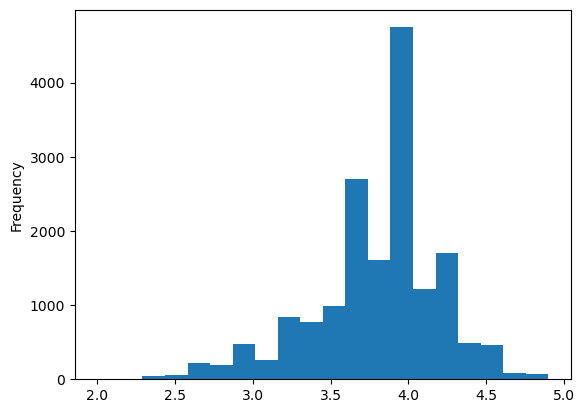

In [82]:
df['RATING'].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

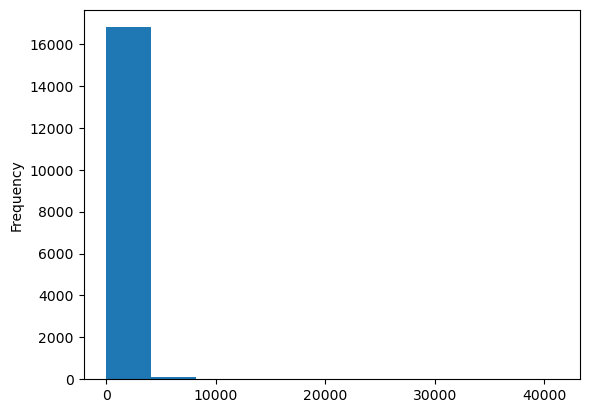

In [83]:
df['VOTES'].plot.hist()

<Axes: xlabel='RATING', ylabel='COST'>

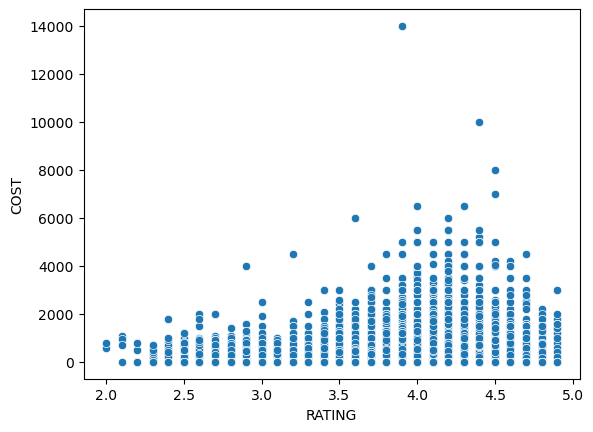

In [84]:
sns.scatterplot(data=df, x='RATING',y='COST')

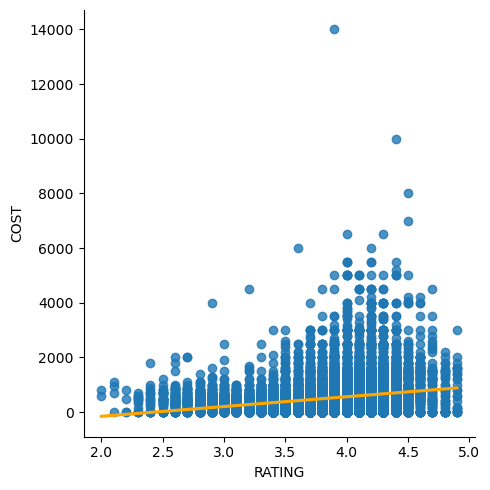

In [85]:
sns.lmplot(data=df, x='RATING', y='COST', line_kws={'color':'orange'})

<Axes: xlabel='VOTES', ylabel='COST'>

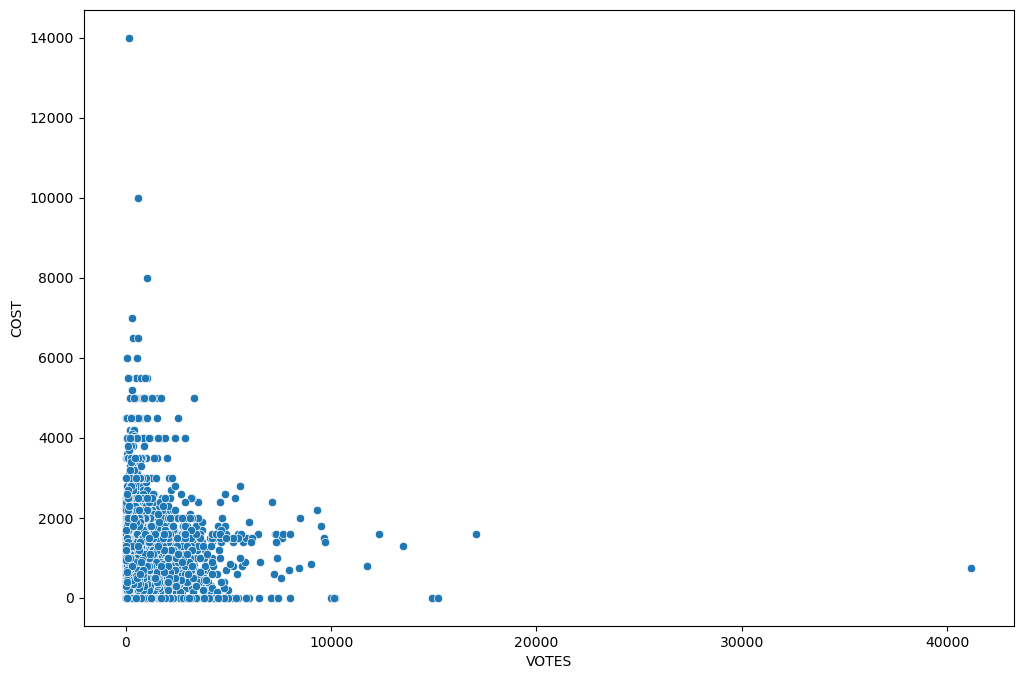

In [86]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='VOTES', y='COST')

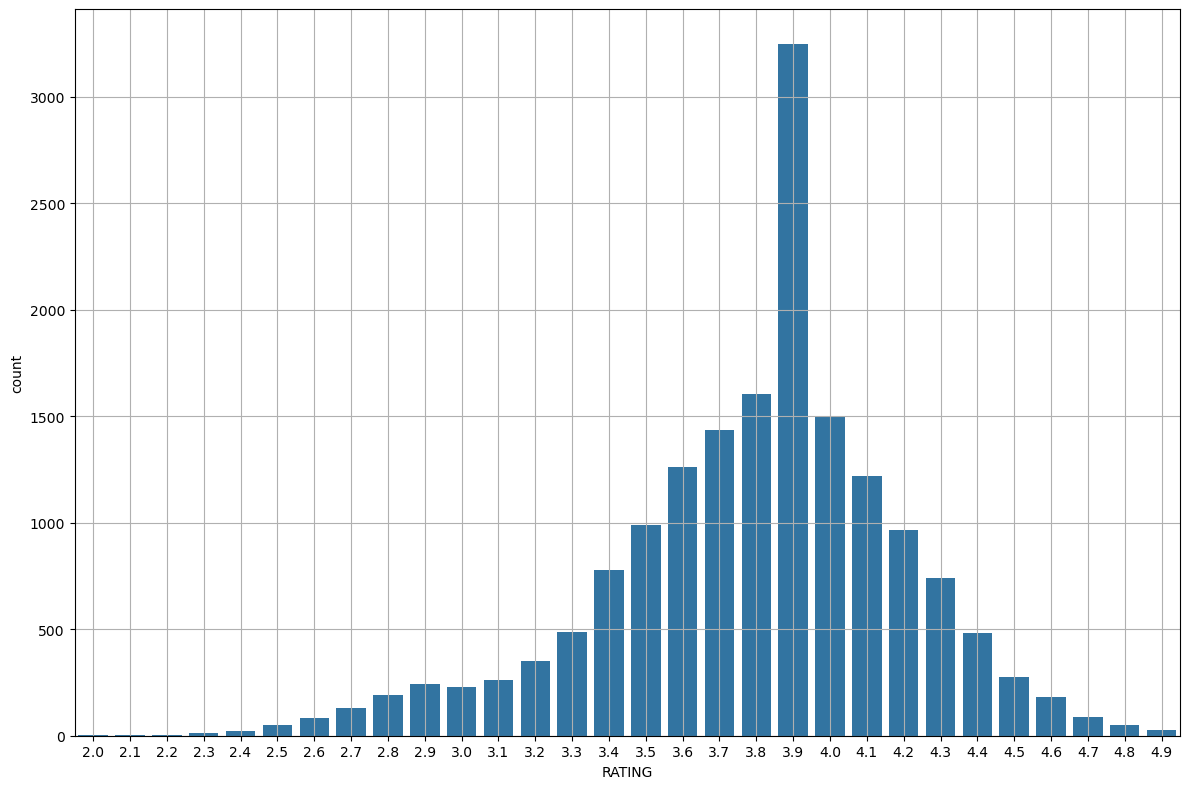

In [87]:

plt.figure(figsize=(12,8))
sns.countplot(data=df, x='RATING')
plt.grid()
plt.tight_layout()

<Axes: ylabel='Frequency'>

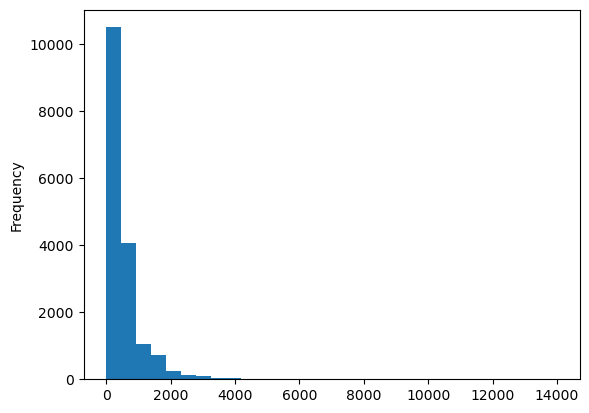

In [88]:
df['COST'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

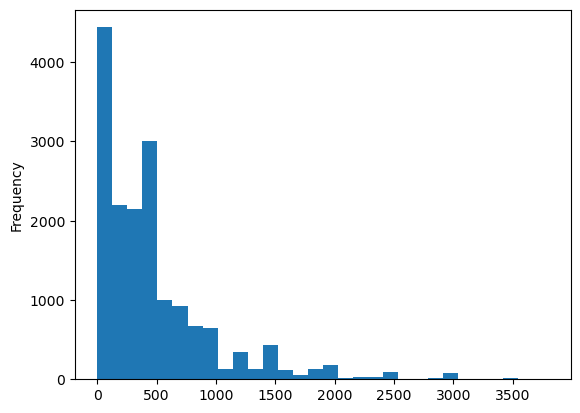

In [89]:
df[df['COST']<4000.0]['COST'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

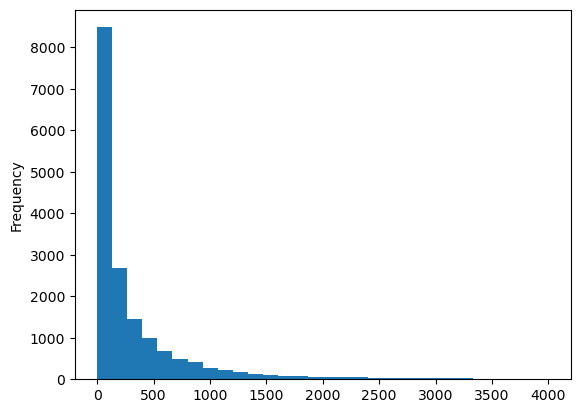

In [90]:
df[df['VOTES']<4000]['VOTES'].plot.hist(bins=30)

In [91]:
#DATA PREPROCESSING

In [92]:
df.head()

,TITLE,CITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT,BAKERY,GOAN,MUGHLAI
0,CASUAL,Thane,3.6,49,1200.0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,CASUAL,Chennai,4.2,30,1500.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CASUAL,Chennai,3.8,221,800.0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,QUICK,Mumbai,4.1,24,800.0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,DESSERT,Mumbai,3.8,165,300.0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16921 entries, 0 to 4230
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TITLE         16921 non-null  object 
 1   CITY          16921 non-null  object 
 2   RATING        16921 non-null  float64
 3   VOTES         16921 non-null  int64  
 4   COST          16921 non-null  float64
 5   NORTH INDIAN  16921 non-null  int64  
 6   SOUTH INDIAN  16921 non-null  int64  
 7   CHINESE       16921 non-null  int64  
 8   CONTINENTAL   16921 non-null  int64  
 9   ITALIAN       16921 non-null  int64  
 10  AMERICAN      16921 non-null  int64  
 11  MALWANI       16921 non-null  int64  
 12  ARABIC        16921 non-null  int64  
 13  BURGER        16921 non-null  int64  
 14  DESSERT       16921 non-null  int64  
 15  BAKERY        16921 non-null  int64  
 16  GOAN          16921 non-null  int64  
 17  MUGHLAI       16921 non-null  int64  
dtypes: float64(2), int64(14), object

In [94]:
df.isnull().sum()

TITLE           0
CITY            0
RATING          0
VOTES           0
COST            0
NORTH INDIAN    0
SOUTH INDIAN    0
CHINESE         0
CONTINENTAL     0
ITALIAN         0
AMERICAN        0
MALWANI         0
ARABIC          0
BURGER          0
DESSERT         0
BAKERY          0
GOAN            0
MUGHLAI         0
dtype: int64

In [95]:
#We will fill title city with most frequently occuring values

In [96]:
from feature_engine.imputation import CategoricalImputer

In [97]:
categorical_imputer = CategoricalImputer(fill_value='frequent', variables='TITLE')

In [98]:
df = categorical_imputer.fit_transform(df)
df

,TITLE,CITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT,BAKERY,GOAN,MUGHLAI
0,CASUAL,Thane,3.6,49,1200.0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,CASUAL,Chennai,4.2,30,1500.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CASUAL,Chennai,3.8,221,800.0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,QUICK,Mumbai,4.1,24,800.0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,DESSERT,Mumbai,3.8,165,300.0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,New,3.9,287,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1
4227,nan,Bangalore,4.3,469,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0
4228,QUICK,Faridabad,3.7,53,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0
4229,QUICK,Kochi,3.9,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
categorical_imputer = CategoricalImputer(fill_value='frequent', variables='CITY')

In [100]:
df = categorical_imputer.fit_transform(df)
df

,TITLE,CITY,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,BURGER,DESSERT,BAKERY,GOAN,MUGHLAI
0,CASUAL,Thane,3.6,49,1200.0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,CASUAL,Chennai,4.2,30,1500.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CASUAL,Chennai,3.8,221,800.0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,QUICK,Mumbai,4.1,24,800.0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,DESSERT,Mumbai,3.8,165,300.0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL,New,3.9,287,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1
4227,nan,Bangalore,4.3,469,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0
4228,QUICK,Faridabad,3.7,53,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0
4229,QUICK,Kochi,3.9,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16921 entries, 0 to 4230
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TITLE         16921 non-null  object 
 1   CITY          16921 non-null  object 
 2   RATING        16921 non-null  float64
 3   VOTES         16921 non-null  int64  
 4   COST          16921 non-null  float64
 5   NORTH INDIAN  16921 non-null  int64  
 6   SOUTH INDIAN  16921 non-null  int64  
 7   CHINESE       16921 non-null  int64  
 8   CONTINENTAL   16921 non-null  int64  
 9   ITALIAN       16921 non-null  int64  
 10  AMERICAN      16921 non-null  int64  
 11  MALWANI       16921 non-null  int64  
 12  ARABIC        16921 non-null  int64  
 13  BURGER        16921 non-null  int64  
 14  DESSERT       16921 non-null  int64  
 15  BAKERY        16921 non-null  int64  
 16  GOAN          16921 non-null  int64  
 17  MUGHLAI       16921 non-null  int64  
dtypes: float64(2), int64(14), object

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16921 entries, 0 to 4230
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TITLE         16921 non-null  object 
 1   CITY          16921 non-null  object 
 2   RATING        16921 non-null  float64
 3   VOTES         16921 non-null  int64  
 4   COST          16921 non-null  float64
 5   NORTH INDIAN  16921 non-null  int64  
 6   SOUTH INDIAN  16921 non-null  int64  
 7   CHINESE       16921 non-null  int64  
 8   CONTINENTAL   16921 non-null  int64  
 9   ITALIAN       16921 non-null  int64  
 10  AMERICAN      16921 non-null  int64  
 11  MALWANI       16921 non-null  int64  
 12  ARABIC        16921 non-null  int64  
 13  BURGER        16921 non-null  int64  
 14  DESSERT       16921 non-null  int64  
 15  BAKERY        16921 non-null  int64  
 16  GOAN          16921 non-null  int64  
 17  MUGHLAI       16921 non-null  int64  
dtypes: float64(2), int64(14), object

In [103]:
#We have replaced all null values

In [104]:
for x in df.columns[0:5]:
    print(df[x].nunique())

72
294
30
2076
87


In [105]:
for x in df.columns[0:5]:
    print(x, df[x].nunique())

TITLE 72
CITY 294
RATING 30
VOTES 2076
COST 87


In [106]:
#We will use label encoding for the categorical columns because there are very huge unique values

In [107]:
from sklearn.preprocessing import OneHotEncoder

In [108]:
ohe = OneHotEncoder()

In [109]:
df = pd.get_dummies(data=df, columns=['TITLE','CITY'], dtype=int, drop_first=True)
df

,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,...,CITY_chullickal,CITY_hyderabad,CITY_khar,CITY_kochi,CITY_nan,CITY_navi,CITY_opp,CITY_opposite,CITY_p.o,CITY_ward
0,3.6,49,1200.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,4.2,30,1500.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.8,221,800.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.1,24,800.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.8,165,300.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,3.9,287,0.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4227,4.3,469,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4228,3.7,53,0.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4229,3.9,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
df

,RATING,VOTES,COST,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,...,CITY_chullickal,CITY_hyderabad,CITY_khar,CITY_kochi,CITY_nan,CITY_navi,CITY_opp,CITY_opposite,CITY_p.o,CITY_ward
0,3.6,49,1200.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,4.2,30,1500.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.8,221,800.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.1,24,800.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.8,165,300.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,3.9,287,0.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4227,4.3,469,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4228,3.7,53,0.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4229,3.9,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16921 entries, 0 to 4230
Columns: 380 entries, RATING to CITY_ward
dtypes: float64(2), int64(378)
memory usage: 49.7 MB


In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scaler = StandardScaler()

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X = df.drop('COST', axis=1)
y = df['COST']

In [116]:
X_train = X.iloc[0:12690,]
X_train

,RATING,VOTES,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,...,CITY_chullickal,CITY_hyderabad,CITY_khar,CITY_kochi,CITY_nan,CITY_navi,CITY_opp,CITY_opposite,CITY_p.o,CITY_ward
0,3.6,49,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4.2,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.8,221,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.1,24,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.8,165,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,3.8,546,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12686,4.3,1214,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12687,4.0,608,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12688,3.5,32,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
X_test = X.iloc[12690:,]
X_test

,RATING,VOTES,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,...,CITY_chullickal,CITY_hyderabad,CITY_khar,CITY_kochi,CITY_nan,CITY_navi,CITY_opp,CITY_opposite,CITY_p.o,CITY_ward
0,4.3,564,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.2,61,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.8,350,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.8,1445,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.6,23,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,3.9,287,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4227,4.3,469,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4228,3.7,53,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4229,3.9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
y_train = y.iloc[0:12690]
y_train

0        1200.0
1        1500.0
2         800.0
3         800.0
4         300.0
          ...  
12685     500.0
12686    1800.0
12687    1300.0
12688     400.0
12689     600.0
Name: COST, Length: 12690, dtype: float64

In [119]:
y_test = y.iloc[12690:]
y_test

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4226    0.0
4227    0.0
4228    0.0
4229    0.0
4230    0.0
Name: COST, Length: 4231, dtype: float64

In [120]:
X_train.shape

(12690, 379)

In [121]:
X_test.shape

(4231, 379)

In [122]:
X_train

,RATING,VOTES,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,...,CITY_chullickal,CITY_hyderabad,CITY_khar,CITY_kochi,CITY_nan,CITY_navi,CITY_opp,CITY_opposite,CITY_p.o,CITY_ward
0,3.6,49,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4.2,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.8,221,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.1,24,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.8,165,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,3.8,546,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12686,4.3,1214,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12687,4.0,608,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12688,3.5,32,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train

,RATING,VOTES,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,...,CITY_chullickal,CITY_hyderabad,CITY_khar,CITY_kochi,CITY_nan,CITY_navi,CITY_opp,CITY_opposite,CITY_p.o,CITY_ward
0,-0.487207,-0.403533,1.165084,-0.467245,-0.724482,-0.374792,-0.314924,-0.156665,15.441307,0.0,...,-0.008877,-0.008877,-0.008877,-0.012555,-0.094363,-0.008877,-0.012555,0.0,-0.012555,-0.008877
1,1.001812,-0.426964,-0.858307,-0.467245,-0.724482,-0.374792,-0.314924,-0.156665,-0.064761,0.0,...,-0.008877,-0.008877,-0.008877,-0.012555,-0.094363,-0.008877,-0.012555,0.0,-0.012555,-0.008877
2,0.009133,-0.191427,1.165084,-0.467245,1.380297,-0.374792,-0.314924,-0.156665,-0.064761,0.0,...,-0.008877,-0.008877,-0.008877,-0.012555,-0.094363,-0.008877,-0.012555,0.0,-0.012555,-0.008877
3,0.753642,-0.434363,-0.858307,-0.467245,1.380297,-0.374792,-0.314924,-0.156665,-0.064761,0.0,...,-0.008877,-0.008877,-0.008877,-0.012555,-0.094363,-0.008877,-0.012555,0.0,-0.012555,-0.008877
4,0.009133,-0.260485,-0.858307,-0.467245,-0.724482,-0.374792,-0.314924,-0.156665,-0.064761,0.0,...,-0.008877,-0.008877,-0.008877,-0.012555,-0.094363,-0.008877,-0.012555,0.0,-0.012555,-0.008877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,0.009133,0.209355,1.165084,-0.467245,-0.724482,-0.374792,-0.314924,-0.156665,-0.064761,0.0,...,-0.008877,-0.008877,-0.008877,-0.012555,-0.094363,-0.008877,-0.012555,0.0,-0.012555,-0.008877
12686,1.249982,1.033116,-0.858307,-0.467245,-0.724482,2.668146,-0.314924,-0.156665,-0.064761,0.0,...,-0.008877,-0.008877,-0.008877,-0.012555,-0.094363,-0.008877,-0.012555,0.0,-0.012555,-0.008877
12687,0.505472,0.285812,-0.858307,-0.467245,1.380297,2.668146,-0.314924,-0.156665,-0.064761,0.0,...,-0.008877,-0.008877,-0.008877,-0.012555,-0.094363,-0.008877,-0.012555,0.0,-0.012555,-0.008877
12688,-0.735377,-0.424497,1.165084,2.140204,1.380297,-0.374792,-0.314924,-0.156665,-0.064761,0.0,...,-0.008877,-0.008877,-0.008877,-0.012555,-0.094363,-0.008877,-0.012555,0.0,-0.012555,-0.008877


In [124]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test

,RATING,VOTES,NORTH INDIAN,SOUTH INDIAN,CHINESE,CONTINENTAL,ITALIAN,AMERICAN,MALWANI,ARABIC,...,CITY_chullickal,CITY_hyderabad,CITY_khar,CITY_kochi,CITY_nan,CITY_navi,CITY_opp,CITY_opposite,CITY_p.o,CITY_ward
0,1.249982,0.231552,1.165084,-0.467245,1.380297,-0.374792,-0.314924,-0.156665,-0.064761,0.0,...,-0.008877,-0.008877,-0.008877,-0.012555,-0.094363,-0.008877,-0.012555,0.0,-0.012555,-0.008877
1,1.001812,-0.388735,1.165084,2.140204,-0.724482,-0.374792,-0.314924,-0.156665,-0.064761,0.0,...,-0.008877,-0.008877,-0.008877,-0.012555,-0.094363,-0.008877,-0.012555,0.0,-0.012555,-0.008877
2,0.009133,-0.032348,1.165084,-0.467245,1.380297,-0.374792,-0.314924,-0.156665,-0.064761,0.0,...,-0.008877,-0.008877,-0.008877,-0.012555,-0.094363,-0.008877,-0.012555,0.0,-0.012555,-0.008877
3,0.009133,1.317979,-0.858307,-0.467245,-0.724482,-0.374792,-0.314924,-0.156665,-0.064761,0.0,...,-0.008877,-0.008877,-0.008877,-0.012555,-0.094363,-0.008877,-0.012555,0.0,-0.012555,-0.008877
4,-0.487207,-0.435596,-0.858307,2.140204,-0.724482,-0.374792,-0.314924,-0.156665,-0.064761,0.0,...,-0.008877,-0.008877,-0.008877,-0.012555,-0.094363,-0.008877,-0.012555,0.0,-0.012555,-0.008877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,0.257303,-0.110038,1.165084,-0.467245,1.380297,-0.374792,-0.314924,-0.156665,-0.064761,0.0,...,-0.008877,-0.008877,-0.008877,-0.012555,-0.094363,-0.008877,-0.012555,0.0,-0.012555,-0.008877
4227,1.249982,0.114400,1.165084,-0.467245,-0.724482,-0.374792,-0.314924,-0.156665,-0.064761,0.0,...,-0.008877,-0.008877,-0.008877,-0.012555,-0.094363,-0.008877,-0.012555,0.0,-0.012555,-0.008877
4228,-0.239037,-0.398601,1.165084,-0.467245,-0.724482,2.668146,-0.314924,-0.156665,-0.064761,0.0,...,-0.008877,-0.008877,-0.008877,-0.012555,-0.094363,-0.008877,-0.012555,0.0,-0.012555,-0.008877
4229,0.257303,-0.463959,-0.858307,-0.467245,-0.724482,-0.374792,-0.314924,-0.156665,-0.064761,0.0,...,-0.008877,-0.008877,-0.008877,-0.012555,-0.094363,-0.008877,-0.012555,0.0,-0.012555,-0.008877


In [125]:
#Our data is ready for training

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
linearregression = LinearRegression()

In [138]:
linearregression.fit(X_train, y_train)

LinearRegression()

In [140]:
lr_pred = linearregression.predict(X_test)

In [141]:
lr_pred

array([933.67811059, 416.2051583 , 862.71516558, ..., 501.61035278,
       258.12461578, 749.53698326])

In [142]:
#Lets check training accuracy
lr_train_accuracy = linearregression.predict(X_train)

In [143]:
lr_train_accuracy

array([ 789.4295549 ,  828.30928367,  755.08852066, ..., 1680.35820284,
        623.80243647,  743.83165137])

In [144]:
r2_score(y_train, lr_train_accuracy)

0.6904545494787249

In [145]:
#Now lets try Decision Tree

In [146]:
from sklearn.tree import DecisionTreeRegressor

In [147]:
from sklearn.metrics import r2_score

In [148]:
dtr = DecisionTreeRegressor()

In [149]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [150]:
dtr_pred = dtr.predict(X_test)
dtr_pred

array([800.        , 400.        , 750.        , ..., 400.        ,
       261.81818182, 400.        ])

In [151]:
dtr_train_accuracy = dtr.predict(X_train)
dtr_train_accuracy

array([1200., 1500.,  750., ..., 1300.,  400.,  600.])

In [152]:
r2_score(y_train, dtr_train_accuracy)

0.9928564852783468

In [153]:
#Our decision tree training accuracy is really good

In [154]:
#Now lets try Random Forest

In [155]:
from sklearn.ensemble import RandomForestRegressor

In [156]:
rfr = RandomForestRegressor()

In [157]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [158]:
rfr_pred = rfr.predict(X_test)

In [159]:
rfr_pred

array([1136.5       ,  383.75      ,  725.5       , ...,  405.5       ,
        262.73767207,  403.        ])

In [160]:
rfr_train_accuracy = rfr.predict(X_train)
rfr_train_accuracy

array([1003.5       , 1274.        ,  744.46666667, ..., 1440.5       ,
        443.        ,  608.5       ])

In [161]:
r2_score(y_train, rfr_train_accuracy)

0.9511893586022102

In [162]:
#Now try Gradient Boosting

In [163]:
from sklearn.ensemble import GradientBoostingRegressor

In [164]:
GBR = GradientBoostingRegressor()

In [165]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor()

In [166]:
gbr_pred = GBR.predict(X_test)
gbr_pred

array([1011.69665772,  363.53492295,  706.7530628 , ...,  554.16960174,
        304.79953377,  492.4602941 ])

In [167]:
gbr_train_accuracy = GBR.predict(X_train)
gbr_train_accuracy

array([ 623.03488413,  856.07927115,  665.38808155, ..., 1996.27216743,
        574.90350639,  826.14969947])

In [168]:
r2_score(y_train, gbr_train_accuracy)

0.7230223071496783

In [169]:
#We will use Decision Tree model as it learns very well on training data

In [170]:
import pickle

In [171]:
with open('FoodCostModel.pkl', 'wb') as file:
    pickle.dump(dtr, file)

In [172]:
#We have save the model as pickle file

<H2>Thus, we have created a model for predicting the cost of the restaurant bill </H2>